## Reference :
[1] https://towardsdatascience.com/svd-in-machine-learning-pca-f25cf9b837ae

[2] https://en.wikipedia.org/wiki/Principal_component_analysis#Find_the_covariance_matrix

## Todo
1. Compare that $Q$ from EVD and $V$ from SVD.
2. Why not the sum of squares of loads for a variable is not one?

In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris['data']
y = iris['target']
n = X_.shape[0]

#X_ = X - X.mean(axis=0) # Centered
X_ = X - X.mean(axis=0) # Standardized
X_ /= np.std(X_, 0)
feature_names = [" ".join(name.split(" ")[:-1])
                 for name in iris['feature_names']]

# PCA though EVD (Eigenvalue Decomposition)

$C$ is a covariance matrix which is positive semi-definite, so it can be broken into perpendicular eigenvectors.

$C = \frac{X^TX}{n-1}$ = $Q{\Lambda}Q^T$
, where $Q$ is an orthogonal matrix whose columns are the eigenvectors of C, ${\Lambda}$ is a diagonal matrix with the corresponding eigenvalues of Q.

i-th column of $Q$ is called the i-th principal direction (component) and 1st principal component has the largest varince. 

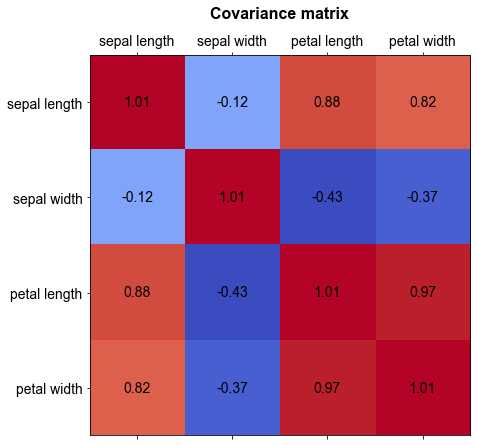

In [33]:
C = (X_.T@X_) / (n-1)

plt.figure(figsize=(10, 7))
plt.matshow(C, cmap="coolwarm", fignum=False)
plt.title("Covariance matrix", y=1.08, fontproperties=TITLE_FONT)
plt.xticks(range(len(feature_names)), feature_names, fontproperties=AXIS_FONT)
plt.yticks(range(len(feature_names)), feature_names, fontproperties=AXIS_FONT)

for (i, j), z in np.ndenumerate(C):
    plt.text(j, i, '{:0.2f}'.format(z), ha='center', va='center', fontproperties=AXIS_FONT)

In [49]:
# EVD
e_vals, e_vecs = np.linalg.eig(C)
idx = e_vals.argsort()[::-1]   
e_vals = e_vals[idx]
e_vecs = e_vecs[:,idx]
print (f'Eigen values: {e_vals}')

Eigen values: [2.93808505 0.9201649  0.14774182 0.02085386]


# PCA though  SVD (Singular Value Decomposition)


$X = U{\Sigma}V^T$

$C = \frac{X^TX}{n-1} = \frac{V\Sigma^TU^TU{\Sigma}V^T}{n-1}$ = $V\frac { { \Sigma  }^{ 2 } }{ n-1 } { V }^{ T }$



Loadings are obtained by scaling eigenvectors with the squre root of corresponding eigenvalues, ${\Sigma}V^T$. A loading is effectively the projection of a variable onto a left sigular vector of $X$, that is $U^TX$. 

$U^TX = {\Sigma}V^T$




In [35]:
u, sigma, vt = np.linalg.svd(X_, full_matrices=False)

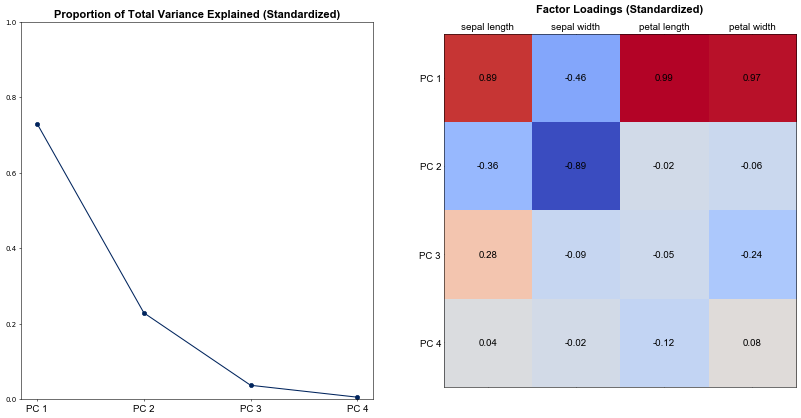

In [87]:
from matplotlib.font_manager import FontProperties

TITLE_FONT = FontProperties(family="Arial", size=16, weight="semibold")
AXIS_FONT = FontProperties(family="Arial", size=14)
LASALLE_BLUE = "#00245D"

p = vt.shape[0]
pc_labels = ["PC %s" % (i+1) for i in range(p)]

# Calculate proportion of variance explained
eig_val = sigma**2 / (X_.shape[0] - 1)
ve = eig_val / eig_val.sum()

plt.figure(figsize=(20, 10), dpi=50)

# plot proportion of total variance explained
plt.subplot(1, 2, 1)
plt.plot(range(p), ve, 'o-', c=LASALLE_BLUE)
plt.title("Proportion of Total Variance Explained (Standardized)", fontproperties=TITLE_FONT)
plt.xticks(range(p), pc_labels, fontproperties=AXIS_FONT)
plt.ylim(0, 1)


# Plot factor loadings
plt.subplot(1, 2, 2)
plt.matshow(np.diag(np.sqrt(eig_val))@vt, cmap="coolwarm", fignum=False)
plt.title("Factor Loadings (Standardized)", fontproperties=TITLE_FONT)
plt.yticks(range(p), pc_labels, fontproperties=AXIS_FONT)
plt.xticks(range(p), feature_names, fontproperties=AXIS_FONT)
plt.tick_params(axis='both', length=0.5, direction='out')
for (i, j), z in np.ndenumerate(np.diag(np.sqrt(eig_val))@vt):
    plt.text(j, i, '{:0.2f}'.format(z), ha='center', va='center', fontproperties=AXIS_FONT)

The variance in data is explained by the top two principal components, so it would be enough to take those two.

In [26]:
print (f'Variance explained by principal components {ve}')
print (f'Variance explained by top two principal components: {sum(ve[:2])}')

Variance explained by principal components [0.72962445 0.22850762 0.03668922 0.00517871]
Variance explained by top two principal components: 0.9581320720000164


The score matrix $T$ can be written, which is basically the projection of each row on the right singular vectors, $V$. 

$T = XV = U{\Sigma}V^TV = U{\Sigma}$

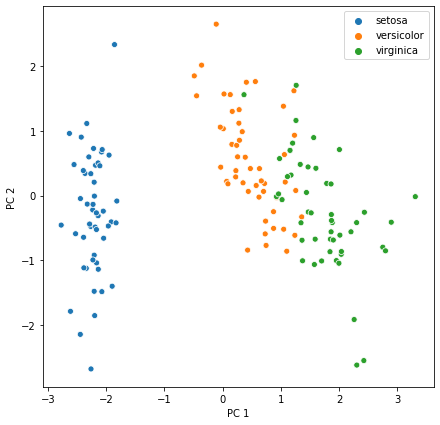

In [88]:
import seaborn as sns

T = u[:,:2]@np.diag(sigma[:2])

plt.figure(figsize=(7, 7))
sns.scatterplot(x=T[:,0], y=T[:,1], hue=iris.target_names[y])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

# Biplot

The code to plot a biplot is from https://stackoverflow.com/questions/39216897/plot-pca-loadings-and-loading-in-biplot-in-sklearn-like-rs-autoplot

In [89]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    
    plt.figure(figsize=(7, 7))
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.0, coeff[i,1] * 1.0, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.0, coeff[i,1] * 1.0, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC {}".format(1))
    plt.ylabel("PC {}".format(2))
    plt.grid()

As seen in the covariance matrix, `sepal_width` can be distinguished from other three variables. It has the opposite sign to other variables in PC1.

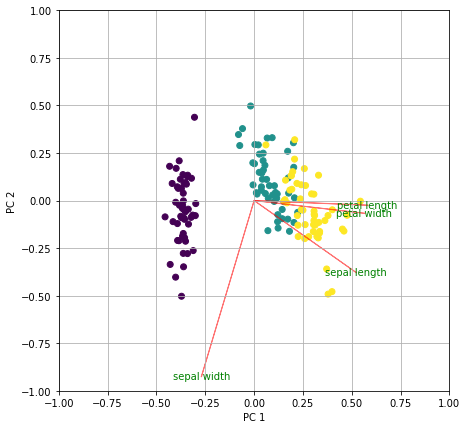

In [90]:
myplot(T[:,0:2],np.transpose(vt[:2,:]), feature_names)
plt.show()